In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as skl
import matplotlib.pyplot as plt
%matplotlib inline

## load data

In [2]:
data = pd.read_csv("data/cleaned_train_with_geo_distance.csv")
data.shape
data

,fare_amount,passenger_count,isAirport,year,hour,distance
0,4.50,1,0,2009,17,0.640494
1,16.90,1,0,2010,16,5.250728
2,5.70,2,0,2011,0,0.863421
3,7.70,1,0,2012,4,1.739405
4,5.30,1,0,2010,7,1.242232
5,12.10,1,0,2011,9,2.353308
6,7.50,1,0,2012,20,0.966744
7,16.50,1,0,2012,17,2.582102
8,9.00,1,0,2012,13,0.778731
9,8.90,2,0,2009,1,1.770696


In [3]:
# use assenger_count, isAirport, isAirport, year, hour, distance as X, i.e. feasure set
features = ['year', 'hour', 'distance', 'passenger_count', 'isAirport']

#do the concatenate, so the first feature becomes the bias term
input = data[features].values
X = np.concatenate( ( np.ones((input.shape[0], 1)), input ), axis = 1 )

# use fare_amount as Y, i.e. predicting results
Y = data['fare_amount'].values

## Split data using 4-fold cross validation

In [4]:
l = int(data.shape[0]/4)

# use 25% of data as testing data
test1_x = X[l*0: l*(0+1)]
test2_x = X[l*1: l*(1+1)]
test3_x = X[l*2: l*(2+1)]
test4_x = X[l*3: l*(3+1)]

test1_y = Y[l*0: l*(0+1)]
test2_y = Y[l*1: l*(1+1)]
test3_y = Y[l*2: l*(2+1)]
test4_y = Y[l*3: l*(3+1)]

# use 75% of data set as training data
train1_x = np.concatenate((test2_x, test3_x, test4_x), axis = 0)
train2_x = np.concatenate((test1_x, test3_x, test4_x), axis = 0)
train3_x = np.concatenate((test1_x, test2_x, test4_x), axis = 0)
train4_x = np.concatenate((test1_x, test2_x, test3_x), axis = 0)

train1_y = Y[l*1:]
train2_y = np.concatenate((Y[:l*1], Y[l*2:]),axis = 0)
train3_y = np.concatenate((Y[:l*2], Y[l*3:]),axis = 0)
train4_y = Y[:l*3]

In [5]:
# function to plot the analysis of predicting redults
from sklearn.metrics import mean_squared_error, explained_variance_score

def plot_prediction_analysis(y, y_pred, figsize=(10,4), title=''):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].scatter(y, y_pred)
    mn = min(np.min(y), np.min(y_pred))
    mx = max(np.max(y), np.max(y_pred))
    axs[0].plot([mn, mx], [mn, mx], c='red')
    axs[0].set_xlabel('$y$')
    axs[0].set_ylabel('$\hat{y}$')
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    evs = explained_variance_score(y, y_pred)
    axs[0].set_title('rmse = {:.2f}, evs = {:.2f}'.format(rmse, evs))
    
    axs[1].hist(y-y_pred, bins=50)
    avg = np.mean(y-y_pred)
    std = np.std(y-y_pred)
    axs[1].set_xlabel('$y - \hat{y}$')
    axs[1].set_title('Histrogram prediction error, $\mu$ = {:.2f}, $\sigma$ = {:.2f}'.format(avg, std))
    
    if title!='':
        fig.suptitle(title)
        
# function to calculate mean square error
def mse(y,predict_y):
    return skl.mean_squared_error(y,predict_y)

## Linear Regression Model:
### (1) Update features weights by gradient descent

In [6]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    m = len(y) # number of training examples

    J = np.sum((X.dot(theta)-y)**2)/2/m # Calculate the cost with given parameters
    
    return J

def gradient_descent(X, y, learning_rate, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, learning_rate, iterations) 
    updates theta by taking #iterations of gradient steps with learning_rate
    """
    cost_history = [0] * iterations
    m = len(y)
    theta = [1] * X.shape[1]
    
    for iteration in range(iterations):
        predict_y = X.dot(theta)
        loss = predict_y-y
        gradient = X.T.dot(loss)/m
        theta = theta - learning_rate*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        
    return theta, cost_history

#### Use 0.0000001 as learning rate and 1000 as iteration number 

In [7]:
# Apply linear regression model using gradient decent to minimize error
theta1, cost_history1 = gradient_descent(train1_x, train1_y, 0.0000001, 1000)
theta2, cost_history2 = gradient_descent(train2_x, train2_y, 0.0000001, 1000)
theta3, cost_history3 = gradient_descent(train3_x, train3_y, 0.0000001, 1000)
theta4, cost_history4 = gradient_descent(train4_x, train4_y, 0.0000001, 1000)

In [8]:
# Predict on test y based on trained model
predict1_y = test1_x.dot(theta1)
predict2_y = test2_x.dot(theta2)
predict3_y = test3_x.dot(theta3)
predict4_y = test4_x.dot(theta4)
# Compute mean value error for gradient descent
print("Mean square error on Test Set 1 is: {}".format(float(mse(test1_y,predict1_y))))
print("Mean square error on Test Set 2 is: {}".format(float(mse(test2_y,predict2_y))))
print("Mean square error on Test Set 3 is: {}".format(float(mse(test3_y,predict3_y))))
print("Mean square error on Test Set 4 is: {}".format(float(mse(test4_y,predict4_y))))

Mean square error on Test Set 1 is: 113.24001981015391
Mean square error on Test Set 2 is: 98.10146301151843
Mean square error on Test Set 3 is: 97.60159302485155
Mean square error on Test Set 4 is: 104.0062731410775


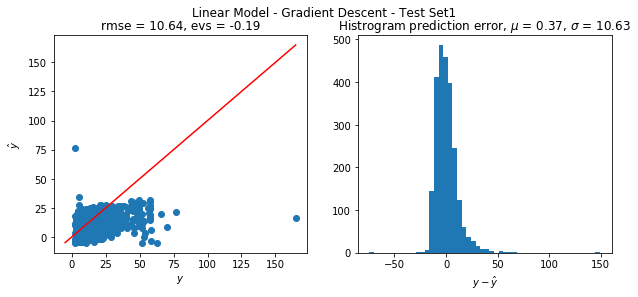

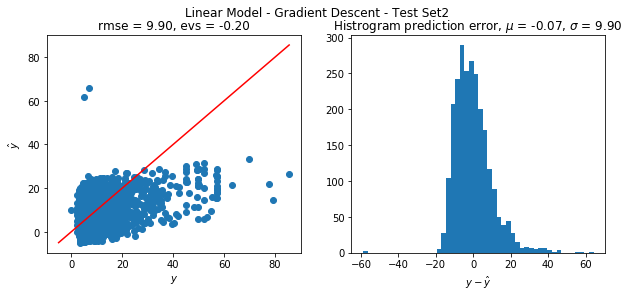

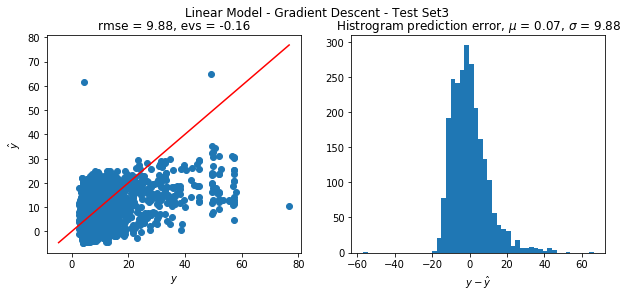

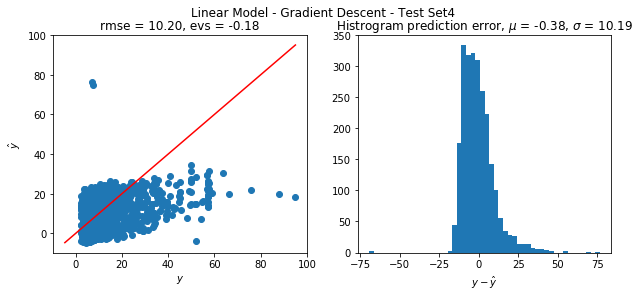

In [9]:
plot_prediction_analysis(test1_y, predict1_y, title='Linear Model - Gradient Descent - Test Set1')
plot_prediction_analysis(test2_y, predict2_y, title='Linear Model - Gradient Descent - Test Set2')
plot_prediction_analysis(test3_y, predict3_y, title='Linear Model - Gradient Descent - Test Set3')
plot_prediction_analysis(test4_y, predict4_y, title='Linear Model - Gradient Descent - Test Set4')

### (2) Get fiitting features weights by gradient descent

In [10]:
def closed_form(train_X,train_Y):
    return np.dot(np.dot(np.linalg.inv(np.dot(train_X.T, train_X)), train_X.T), train_Y)

In [11]:
# Apply linear regression model using closed form without regularization
betas1 = closed_form(train1_x, train1_y)
betas2 = closed_form(train2_x, train2_y)
betas3 = closed_form(train3_x, train3_y)
betas4 = closed_form(train4_x, train4_y)

predict1_y = np.dot(test1_x, betas1)
predict2_y = np.dot(test2_x, betas2)
predict3_y = np.dot(test3_x, betas3)
predict4_y = np.dot(test4_x, betas4)

In [12]:
# Compute mean value error for closed form without regularization
print("Mean square error on Test Set 1 is: {}".format(float(mse(test1_y,predict1_y))))
print("Mean square error on Test Set 2 is: {}".format(float(mse(test2_y,predict2_y))))
print("Mean square error on Test Set 3 is: {}".format(float(mse(test3_y,predict3_y))))
print("Mean square error on Test Set 4 is: {}".format(float(mse(test4_y,predict4_y))))

Mean square error on Test Set 1 is: 48.1525095706356
Mean square error on Test Set 2 is: 35.65975333931199
Mean square error on Test Set 3 is: 31.86999983709479
Mean square error on Test Set 4 is: 36.758348898265716


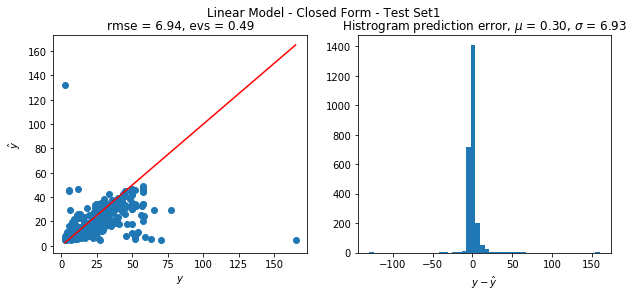

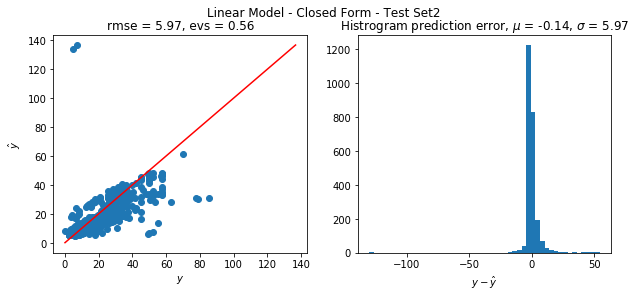

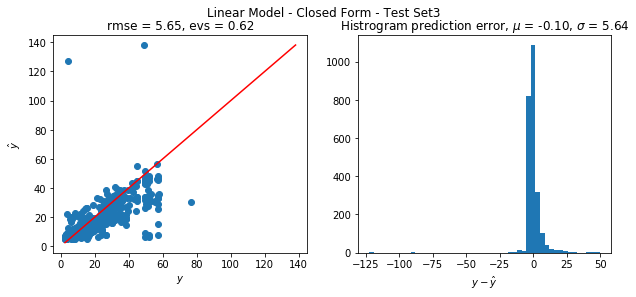

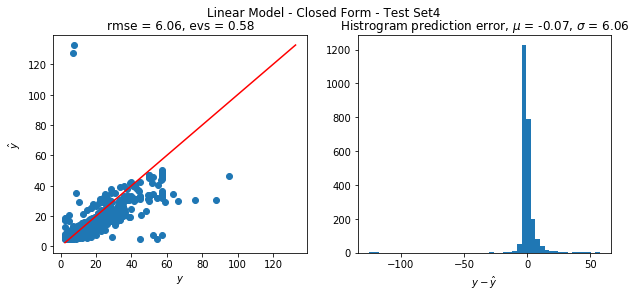

In [13]:
plot_prediction_analysis(test1_y, predict1_y, title='Linear Model - Closed Form - Test Set1')
plot_prediction_analysis(test2_y, predict2_y, title='Linear Model - Closed Form - Test Set2')
plot_prediction_analysis(test3_y, predict3_y, title='Linear Model - Closed Form - Test Set3')
plot_prediction_analysis(test4_y, predict4_y, title='Linear Model - Closed Form - Test Set4')

### Now we add regularization

In [14]:
def re_closed_form(train_X,train_Y, lr):
    diag = np.eye(6)*lr
    return np.dot(np.dot(np.linalg.inv(np.dot(train_X.T, train_X)+diag), train_X.T), train_Y)

In [15]:
# Apply linear regression model using closed form with regularization
betas1 = closed_form(train1_x, train1_y)
betas2 = closed_form(train2_x, train2_y)
betas3 = closed_form(train3_x, train3_y)
betas4 = closed_form(train4_x, train4_y)

predict1_y = np.dot(test1_x, betas1)
predict2_y = np.dot(test2_x, betas2)
predict3_y = np.dot(test3_x, betas3)
predict4_y = np.dot(test4_x, betas4)

In [16]:
# Compute mean value error for closed form without regularization
print("Mean square error on Test Set 1 is: {}".format(float(mse(test1_y,predict1_y))))
print("Mean square error on Test Set 2 is: {}".format(float(mse(test2_y,predict2_y))))
print("Mean square error on Test Set 3 is: {}".format(float(mse(test3_y,predict3_y))))
print("Mean square error on Test Set 4 is: {}".format(float(mse(test4_y,predict4_y))))

Mean square error on Test Set 1 is: 48.1525095706356
Mean square error on Test Set 2 is: 35.65975333931199
Mean square error on Test Set 3 is: 31.86999983709479
Mean square error on Test Set 4 is: 36.758348898265716


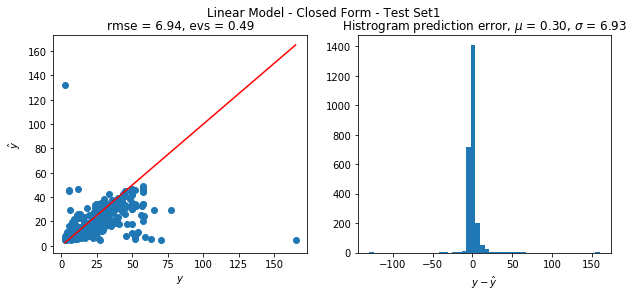

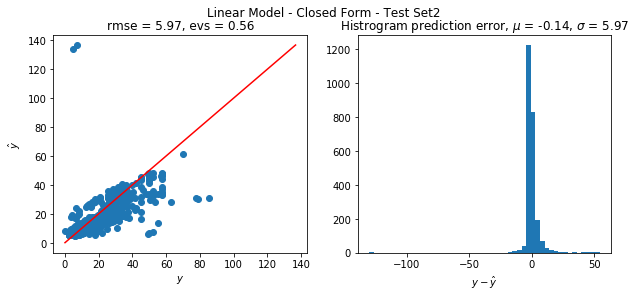

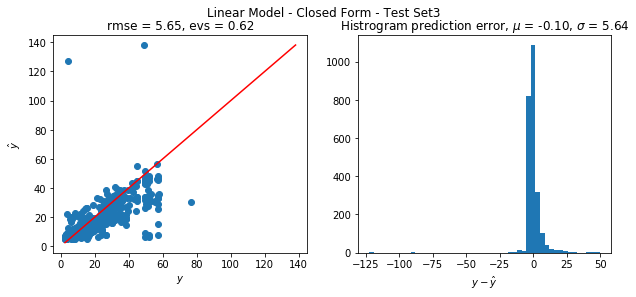

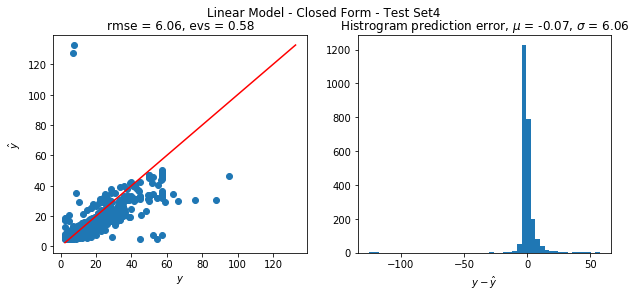

In [17]:
plot_prediction_analysis(test1_y, predict1_y, title='Linear Model - Closed Form - Test Set1')
plot_prediction_analysis(test2_y, predict2_y, title='Linear Model - Closed Form - Test Set2')
plot_prediction_analysis(test3_y, predict3_y, title='Linear Model - Closed Form - Test Set3')
plot_prediction_analysis(test4_y, predict4_y, title='Linear Model - Closed Form - Test Set4')

## Compare our method with sklearn built-in linear regression method

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

model_linear = Pipeline((
        ("standard_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ))

scores = cross_val_score(model_linear, X, Y, scoring='neg_mean_squared_error', cv=4,)
print("Mean Sqaured Error in 4 fold cross valification is:")
print(scores)

Mean Sqaured Error in 4 fold cross valification is:
[-48.15250957 -35.65975334 -31.86999984 -36.7583489 ]
